In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the data set
penguins_df = pd.read_excel("input/palmer_penguins.xlsx")

In [4]:
# recode the target variable
penguins_df["species_recoded"] = penguins_df["species"].map({"Adelie": 1, "Gentoo": 2, "Chinstrap": 3}).astype(int)

# removing the rows containing NA (especially in feature columns that will be fitted to model)
penguins_df = penguins_df[~(np.isnan(penguins_df.flipper_length_mm)) & ~(np.isnan(penguins_df.body_mass_g))]

In [5]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_recoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1


In [6]:
# split the data set to test and train
predictors = penguins_df[["flipper_length_mm", "body_mass_g"]]
target_var = penguins_df.species_recoded
train_x, test_x, train_y, test_y = train_test_split(predictors, target_var, test_size=0.8, stratify=target_var)

In [7]:
# run the model for 16 values as K for n_neighbors
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,16)

for neighbor in neighbors:
    # instantiating the model
    knn = KNeighborsClassifier(n_neighbors = neighbor)

    # fit the train data in to the model
    knn.fit(train_x, train_y)
    
    # model accuracy evaluation
    train_accuracies[neighbor] = knn.score(train_x, train_y)
    test_accuracies[neighbor] = knn.score(test_x, test_y)

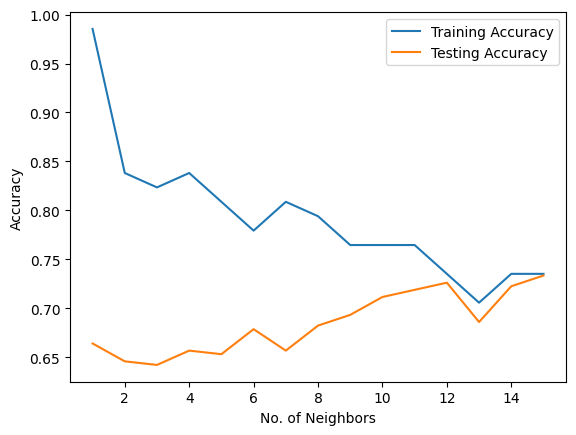

In [8]:
# visualising model complexity
plt.title = "KNN: Varying Number of Neighbors"
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy")

plt.show()